In [1]:
# Carregando alguns módulos essenciais para trabalharmos os dados

# Removendo warnings chatos
import warnings
warnings.filterwarnings('ignore')

# Carregando as principais bibliotecas com o 'import'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999 

#### This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

In [2]:
# Carregando nosso banco de dados
data = pd.read_csv('daily_temperatures_melborne_australia.csv', sep = ',')
data['Temp'] = data.Temp.diff() # Calculando a diferença entre o dia anterior e o atual
# Dados faltantes em 31/12/1984 e 31/12/1988

data.head()

# Filtrando um período menor
data = data[data.Date>='1984-01-01']
data.head()

,Date,Temp
1095,1984-01-01,1.5
1096,1984-01-02,-2.4
1097,1984-01-03,0.0
1098,1984-01-04,-5.1
1099,1984-01-05,-1.0


In [3]:
print('Quantidade de linhas e colunas:', data.shape)
print('Quantidade de dados nulos:', data.isna().sum().sum())

Quantidade de linhas e colunas: (2556, 2)
Quantidade de dados nulos: 0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 1095 to 3650
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2556 non-null   object 
 1   Temp    2556 non-null   float64
dtypes: float64(1), object(1)
memory usage: 59.9+ KB


### O  nosso campo de data está identificado como object vamos usar o comando Datetime (específico para lidar com datas e horários) para transformar o tipo da variável Podemos usar o comando pd.to_datetime() para fazer essa conversão. 

In [5]:
# Convertendo o campo `Date` para datetime
data['Date'] = pd.to_datetime(data['Date'])

# Checando o resutado
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 1095 to 3650
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2556 non-null   datetime64[ns]
 1   Temp    2556 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.9 KB


In [6]:
print('Menor data: {}'.format(data.Date.min())) # Mínimo
print('Maior data: {}'.format(data.Date.max())) # Máximo

Menor data: 1984-01-01 00:00:00
Maior data: 1990-12-31 00:00:00


### Vamos agora construir o gráfico que representa nossa série temporal, usando o `.plot`

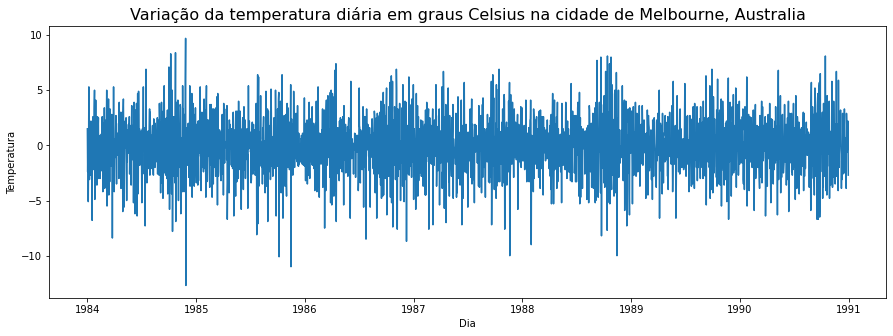

In [7]:
plt.figure(figsize=(15,5))
plt.plot(data.Date,data.Temp)
plt.ylabel('Temperatura')
plt.xlabel('Dia')
plt.title('Variação da temperatura diária em graus Celsius na cidade de Melbourne, Australia',size=16)
#plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Essa série temporal é estacionária? 

### Teste de estacionariedade de Dickey-Fuller


**teste de hipótese** com as seguintes hipóteses:
\begin{cases} H_0= \text{A série não é estacionária} \\ H_1 = \text{A série é estacionária} \end{cases} 

Consideramos a série estacionária se o `p-valor` do teste for menor do que o nível de significância que determinarmos; normalmente usamos `5%`. 

In [8]:
# Importando módulos de teste
from statsmodels.tsa.stattools import adfuller

significancia = 0.05

# Instanciando o teste (o p-valor é sempre o SEGUNDO número da tupla)
teste_fuller_estac = adfuller(data.Temp)

if(teste_fuller_estac[1] <= significancia): 
    print("O p-valor do teste foi de {:.2f}.".format(teste_fuller_estac[1]), 'A série é estacionária.')
else:
    print("O p-valor do teste foi de {:.2f}.".format(teste_fuller_estac[1]), 'A série não é estacionária.')


#output = pd.Series(teste_fuller_estac[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

#for key, value in teste_fuller_estac[4].items():
  #output['Valor crítico(%s)' %key] = value
#print(output)

O p-valor do teste foi de 0.00. A série é estacionária.


# <font color='red'>Exemplo de série Não Estacionária</font>


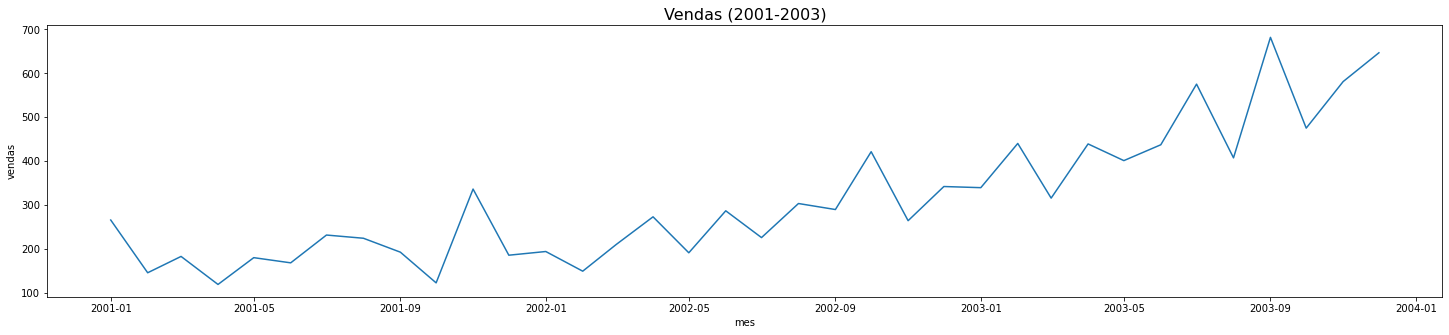

In [79]:
# Carregando dados de série não estacionária
data_nao_estac = pd.read_csv('Vendas.csv',sep=';')
data_nao_estac['mes'] = pd.to_datetime(data_nao_estac['mes'])

# Checando dados
data_nao_estac.head()

# Gráfico dos dados
plt.figure(figsize=(25,5))
plt.plot(data_nao_estac.set_index('mes'))
plt.xlabel('mes')
plt.ylabel('vendas')
plt.title('Vendas (2001-2003)',size=16)
plt.show()

In [10]:
# Teste de estacionariedade
significancia = 0.05

# Instanciando o teste (o p-valor é sempre o SEGUNDO número da tupla)
teste_fuller_naoestac = adfuller(data_nao_estac.vendas) # Colocar apenas a coluna referente aos dados!

if(teste_fuller_naoestac[1] <= significancia): 
    print("O p-valor do teste foi de {:.2f}.".format(teste_fuller_naoestac[1]), 'A série é estacionária.')
else:
    print("O p-valor do teste foi de {:.2f}.".format(teste_fuller_naoestac[1]), 'A série NÃO É estacionária.')

O p-valor do teste foi de 1.00. A série NÃO É estacionária.


# Em alguma situação pode ser necessário remodelar o período dos dados

## Resample 

Para esses casos usamos o resample para fazer agregações por diferentes unidade de tempo (mês, semestre). 

In [11]:
# Copiando o dataset para facilitar o acompanhamento
data_resample = data.copy()

# Incluindo o campo Date como índice
data_resample.set_index('Date',inplace=True) # Inplace para fazer a operação permanente no Dataset

# Checando o dataset final
data_resample.head()

,Temp
Date,
1984-01-01,1.5
1984-01-02,-2.4
1984-01-03,0.0
1984-01-04,-5.1
1984-01-05,-1.0


Quando temos um dataset com o índice sendo do tipo datetime, podemos começar a agrupar os dados por diferentes intervalos de tempo.

Para isso, usamos o método resample

In [12]:
# Reagrupando por mês
data_resample = data_resample.resample('M') # Reagrupando de 2 em 2 meses, 'M' indica 'Month', porém temos mais quebras possíveis!
data_resample

Para termos o dataset novamente, precisamos atrelar a essa operação alguma função de `agregação` dos dados, como a `média`, por exemplo:

In [13]:
# Extraindo a média
data_resample.agg(['mean','std'])

Temp          
                mean       std
Date                          
1984-01-31 -0.190323  2.854044
1984-02-29  0.048276  2.247637
1984-03-31 -0.077419  3.271973
1984-04-30 -0.050000  2.376429
1984-05-31 -0.029032  2.368571
1984-06-30  0.023333  3.136843
1984-07-31  0.038710  2.736504
1984-08-31  0.022581  1.791779
1984-09-30 -0.236667  2.652843
1984-10-31  0.270968  4.157819
1984-11-30 -0.053333  4.177587
1984-12-31  0.183871  2.453174
1985-01-31 -0.048387  2.373868
1985-02-28 -0.150000  2.780021
1985-03-31  0.106452  2.447711
1985-04-30 -0.140000  2.507863
1985-05-31  0.000000  2.570733
1985-06-30  0.010000  2.470704
1985-07-31 -0.138710  3.157602
1985-08-31  0.074194  2.667704
1985-09-30 -0.040000  2.402527
1985-10-31 -0.012903  3.714453
1985-11-30  0.200000  3.045404
1985-12-31  0.051613  1.578580
1986-01-31  0.029032  2.037350
1986-02-28 -0.032143  2.547628
1986-03-31  0.038710  2.964420
1986-04-30 -0.206667  3.534064
1986-05-31  0.048387  1.993802
1986-06-30 -0.336667  2.074390
1986-07-31  0.274194  2.772720
1986-08-31 -0.125806  2.366850
1986-09-30  0.080000  2.857344
1986-10-31  0.196774  3.522356
1986-11-30 -0.213333  3.406154
1986-12-31  0.312903  3.173194
1987-01-31 -0.074194  2.455601
1987-02-28  0.003571  2.754859
1987-03-31 -0.096774  2.559620
1987-04-30 -0.013333  3.254888
1987-05-31 -0.122581  2.521337
1987-06-30  0.006667  2.520527
1987-07-31  0.022581  2.278554
1987-08-31 -0.083871  2.306237
1987-09-30  0.170000  2.987693
1987-10-31  0.103226  2.934335
1987-11-30 -0.026667  3.657768
1987-12-31  0.100000  2.031256
1988-01-31 -0.074194  2.497595
1988-02-29  0.065517  1.979408
1988-03-31 -0.006452  1.781373
1988-04-30 -0.080000  2.804725
1988-05-31 -0.190323  2.006216
1988-06-30  0.050000  2.248026
1988-07-31 -0.003226  2.435362
1988-08-31  0.083871  2.285038
1988-09-30  0.020000  3.721272
1988-10-31 -0.025806  4.289830
1988-11-30  0.003333  3.286491
1988-12-31  0.080000  3.297376
1989-01-31  0.077419  2.362020
1989-02-28  0.071429  2.078436
1989-03-31 -0.190323  1.965257
1989-04-30  0.020000  2.309859
1989-05-31 -0.212903  2.414918
1989-06-30  0.046667  2.124039
1989-07-31 -0.012903  2.165601
1989-08-31  0.012903  2.199506
1989-09-30  0.180000  3.054042
1989-10-31 -0.174194  2.821580
1989-11-30  0.323333  2.683498
1989-12-31 -0.161290  2.488464
1990-01-31  0.109677  2.475931
1990-02-28  0.107143  2.278064
1990-03-31 -0.187097  2.464378
1990-04-30 -0.126667  2.194968
1990-05-31  0.009677  2.781289
1990-06-30 -0.013333  2.296284
1990-07-31 -0.141935  2.095515
1990-08-31  0.093548  2.399158
1990-09-30  0.070000  4.000272
1990-10-31  0.154839  2.954075
1990-11-30 -0.070000  2.879553
1990-12-31  0.009677  2.067584

# Podemos inclusive calcular outras agregações, como por trimestre, semestre e quinzenal

In [14]:
# Agregando por trimestre
data.set_index('Date').resample('3M').agg(['mean','std'])

Temp          
                mean       std
Date                          
1984-01-31 -0.190323  2.854044
1984-04-30 -0.027778  2.653513
1984-07-31  0.010870  2.730353
1984-10-31  0.021739  3.007238
1985-01-31  0.028261  3.068533
1985-04-30 -0.057303  2.549683
1985-07-31 -0.043478  2.723173
1985-10-31  0.007609  2.955763
1986-01-31  0.092391  2.269639
1986-04-30 -0.066292  3.018953
1986-07-31 -0.001087  2.297849
1986-10-31  0.050000  2.925241
1987-01-31  0.010870  3.009124
1987-04-30 -0.037079  2.838189
1987-07-31 -0.031522  2.415833
1987-10-31  0.061957  2.729160
1988-01-31  0.000000  2.772352
1988-04-30 -0.007778  2.206590
1988-07-31 -0.048913  2.214363
1988-10-31  0.026087  3.493318
1989-01-31  0.053846  2.974010
1989-04-30 -0.037079  2.100832
1989-07-31 -0.060870  2.217857
1989-10-31  0.004348  2.685693
1990-01-31  0.088043  2.529207
1990-04-30 -0.074157  2.294833
1990-07-31 -0.048913  2.383851
1990-10-31  0.106522  3.142506
1991-01-31 -0.029508  2.479270

In [15]:
# Agregando por semestre
data.set_index('Date').resample('6M').agg(['mean','std'])

Temp          
                mean       std
Date                          
1984-01-31 -0.190323  2.854044
1984-07-31 -0.008242  2.685255
1985-01-31  0.025000  3.029730
1985-07-31 -0.050276  2.631975
1986-01-31  0.050000  2.628262
1986-07-31 -0.033149  2.669500
1987-01-31  0.030435  2.959425
1987-07-31 -0.034254  2.624635
1988-01-31  0.030978  2.743490
1988-07-31 -0.028571  2.204505
1989-01-31  0.039891  3.236603
1989-07-31 -0.049171  2.155139
1990-01-31  0.046196  2.601825
1990-07-31 -0.061326  2.334035
1991-01-31  0.052288  2.888432

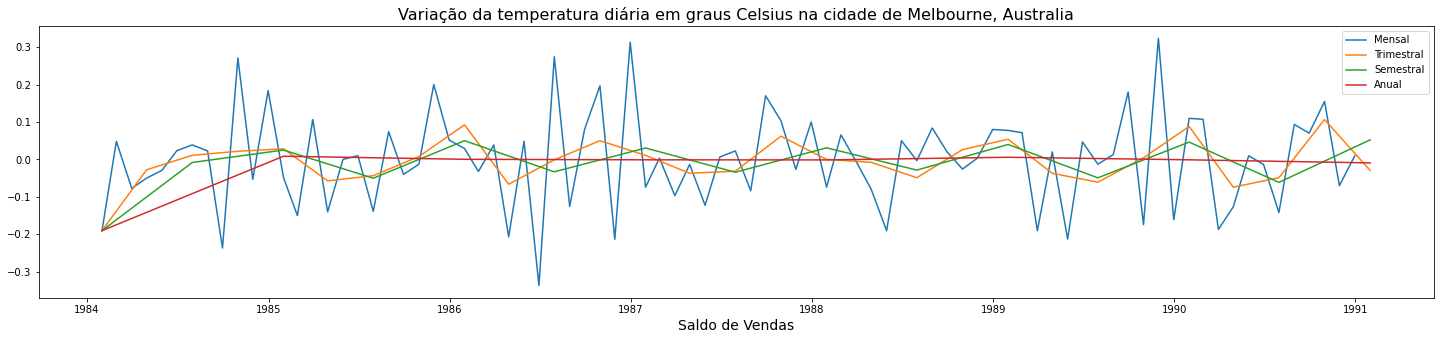

In [27]:
plt.figure(figsize=(25,5))

# Série Mensal
data_mensal = data.set_index('Date').resample('M').mean()
plt.plot(data_mensal) 

# Série Trimestral
data_Anual = data.set_index('Date').resample('3M').mean()
plt.plot(data_Anual) 

# Série Semestral
data_Anual = data.set_index('Date').resample('6M').mean()
plt.plot(data_Anual) 

# Série Anual
data_Anual = data.set_index('Date').resample('12M').mean()
plt.plot(data_Anual) 

# Acertando detalhes do gráfico
plt.xlabel('Dia',size=14)
plt.xlabel('Saldo de Vendas',size=14)
plt.title('Variação da temperatura diária em graus Celsius na cidade de Melbourne, Australia',size=16)
plt.legend(['Mensal','Trimestral','Semestral','Anual'])
plt.show()

# Analisando autocorrelações

In [36]:
Temp = data.set_index('Date',inplace=False).resample('M').mean().reset_index()
Temp.head()

,Date,Temp
0,1984-01-31,-0.190323
1,1984-02-29,0.048276
2,1984-03-31,-0.077419
3,1984-04-30,-0.050000
4,1984-05-31,-0.029032


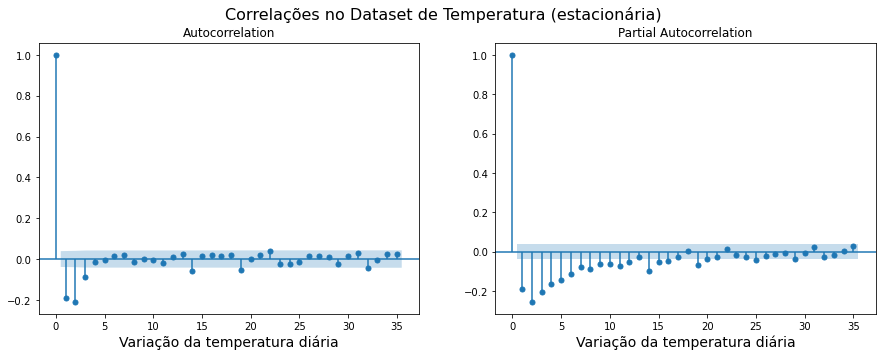

In [30]:
# Importando ACF e PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Construindo os gráficos
# ACF
fig, ax = plt.subplots(1,2,figsize=(15,5)) # Cria um grid de dois gráficos, na horizontal
plot_acf(data.Temp,ax=ax[0], zero=True) # A correlação(0) sempre será 1
ax[0].set_xlabel('Variação da temperatura diária',size=14)

#PACF
plot_pacf(data.Temp,ax=ax[1],zero=True) # A correlação(0) sempre será 1
ax[1].set_xlabel('Variação da temperatura diária',size=14)
plt.suptitle("Correlações no Dataset de Temperatura (estacionária)",size=16)

plt.show()

Considerando que vamos construir mais gráficos de correlações, vamos colocar esses comando em uma `função`:

In [31]:
def plota_correlacoes(dataset, nome_dataset, unidade):
    fig, ax = plt.subplots(1,2,figsize=(15,5)) # Para facilitar, vamos fazer um grid de dois gráficos, na horizontal
    plot_acf(dataset,ax=ax[0],zero=False) # Sem a ACF(0)
    ax[0].set_xlabel('{} (em {})'.format(nome_dataset, unidade),size=16)
    
    plot_pacf(dataset,ax=ax[1],zero=False) # Sem a PACF(0)
    ax[1].set_xlabel('{} (em {})'.format(nome_dataset, unidade),size=16)
    plt.suptitle("Correlações no Dataset de {}".format(nome_dataset,size=16))
    plt.show()
    return None # Não precisamos retornar nada

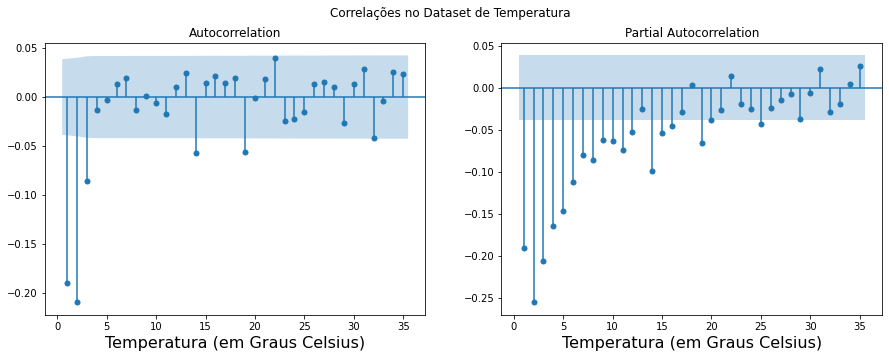

In [32]:
plota_correlacoes(data.Temp,'Temperatura','Graus Celsius')

# <font color='red'> Gráfico de correlação de uma série aleatória</font>


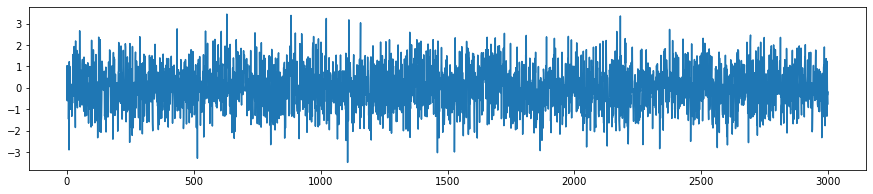

In [33]:
# Construindo uma série aleatória
from random import gauss # importando módulo que constrói uma distribuição Gaussiana

aleatorio = pd.Series([gauss(0.0, 1.0) for i in range(3000)]) # Construindo a série

# Plotando a série
plt.figure(figsize=(15,3))
plt.plot(aleatorio)
plt.show()

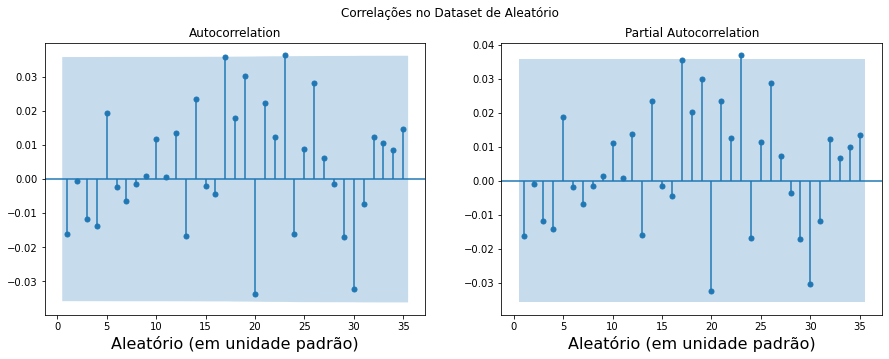

In [34]:
# Plotando as autocorrelações
plota_correlacoes(aleatorio,'Aleatório','unidade padrão')

# Modelagem da série temporal


# 1. Teste de Estacionaridade da série

Fizemos anteriormente - Série estacionária

# 2. Separando em treino e teste

Quando vamos criar um modelo de previsão de séries temporais o ideal é separar os dados em duas partes:

* Treino: estes dados serão a base principal para definir os coeficientes/parâmetros do modelo;
* Teste: são dados que serão separados e não foram vistos pelo modelo e serão usados para testá-lo
e comparar com as previsões (geralmente comparando os valores passo-a-passo).

O tamanho do conjunto de testes é normalmente cerca de 20% da amostra total, mas  esse percentual dependa do tamanho da amostra que você tenha e também quanto tempo adiante você deseja fazer a previsão.

A base de testes deve ser idealmente pelo menos tão grande quanto o horizonte máximo de previsão
necessário. Diferente de outros métodos de previsões, **em séries temporais não podemos dividir os dados de treino e teste com amostras aleatórias de qualquer parte dos dados, deve-se seguir o critério temporal da série, onde os dados de treino
devem vir antes dos dados de teste.**

Como `não podemos usar o futuro para prever o passado`, vamos fazer um **corte temporal** e não aleatório para separar treino e teste

In [37]:
# Modelando os dados de Temperatura 
Temp.head()

,Date,Temp
0,1984-01-31,-0.190323
1,1984-02-29,0.048276
2,1984-03-31,-0.077419
3,1984-04-30,-0.050000
4,1984-05-31,-0.029032


In [38]:
# Relembrando valores mínimo e máximo
print(Temp.Date.min())
print(Temp.Date.max())

1984-01-31 00:00:00
1990-12-31 00:00:00


Vamos separar `a partir de Julho/1990` para teste.

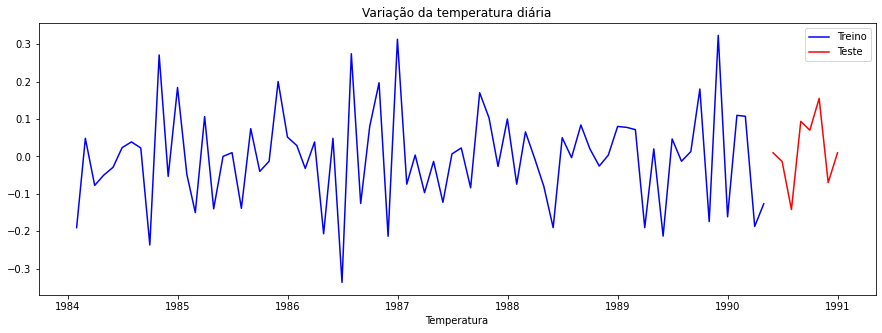

In [39]:
# Data de corte
data_corte = '1990-05-01'

# Separando em treino e teste, pela data e colocando a data como índice
Temp_train = Temp[Temp.Date<data_corte].set_index('Date')
Temp_test = Temp[Temp.Date>=data_corte].set_index('Date')

# Plotando treino e teste
plt.figure(figsize=(15,5))
plt.plot(Temp_train,color='b') # Plotando treino
plt.plot(Temp_test,color='r') # Plotando teste
plt.legend(['Treino','Teste'])
plt.xlabel('Data')
plt.xlabel('Temperatura')
plt.title('Variação da temperatura diária')
plt.show()

Como a série é estacionária, estamos garantindo que os datasets de treino e teste possuem as mesmas características. Em quais cenários essa divisão poderia gerar um **problema**?

`Precisamos garantir que no teste temos todo o comportamento da série (altas, baixas, estáveis).`

### Ajustando uma Autocorrelação (AR)

O modelo `AR` permite que usemos os valores anteriores da série como variaveis explicativas (`features`) da nossa regressão! 

Vamos fazer um modelo AR(1) - Autocorrelação simples, usando apenas **o primeiro atraso** como feature.

$ AR(1): S_t = \mu + \phi_1S_{t-1}+   \varepsilon  _t $


In [40]:
warnings.filterwarnings('ignore')

from statsmodels.tsa.ar_model import AutoReg

# Instanciando o modelo
ar_1 = AutoReg(endog=Temp_train.Temp,lags=1) # lags indica o atraso, endog a série de dados -> AR(1)
# Treinando o modelo
ar_1_trained = ar_1.fit() # Estamos colocando o resultado do ajuste em um novo objeto
ar_1_trained.summary() # Observando conclusões sobre os coeficientes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   Temp   No. Observations:                   76
Model:                     AutoReg(1)   Log Likelihood                  55.796
Method:               Conditional MLE   S.D. of innovations              0.115
Date:                Wed, 29 Jun 2022   AIC                             -4.246
Time:                        15:47:14   BIC                             -4.153
Sample:                    02-29-1984   HQIC                            -4.209
                         - 04-30-1990                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0021      0.013     -0.157      0.876      -0.028       0.024
Temp.L1       -0.4627      0.101     -4.566      0.000      -0.661      -0.264
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1611           +0.0000j            2.1611            0.5000
-----------------------------------------------------------------------------
"""

# Teste de Hipótese para o parametro do modelo 

\begin{cases} H_0:  \phi _1 = 0 \\ H_1:  \phi _1  \neq 0 \end{cases} 

Se `P>|z|` < que o nível de significância alfa (5%), existe uma relação significativa entre o tempo atual e o tempo anterior.

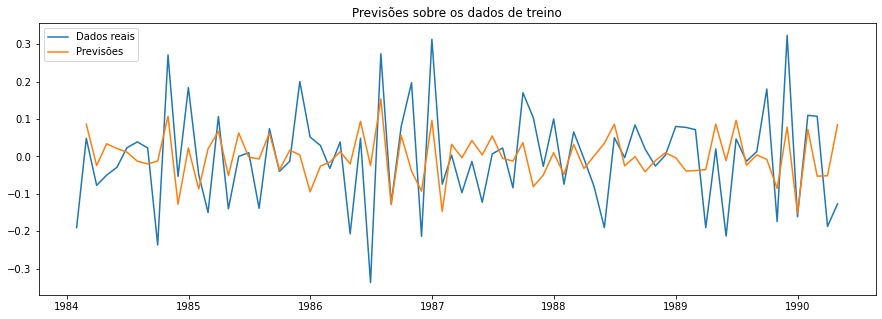

In [41]:
# Prevendo sobre dados de treino
Temp_train['Previsoes'] = ar_1_trained.predict()
Temp_train.head()

# Plotando dados previstos
plt.figure(figsize=(15,5))
plt.plot(Temp_train.Temp)
plt.plot(Temp_train.Previsoes)
plt.legend(['Dados reais','Previsões'])
plt.title('Previsões sobre os dados de treino')
plt.show()

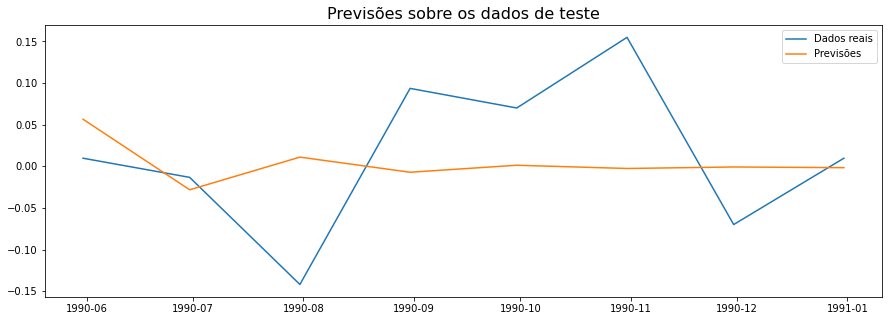

In [71]:
# Prevendo sobre os dados de teste e construindo o gráfico
Temp_test['Previsoes'] = ar_1_trained.predict(start=Temp_train.index.max(),
                                              end=Temp_test.index.max())

# Plotando dados previstos
plt.figure(figsize=(15,5))
plt.plot(Temp_test.Temp)
plt.plot(Temp_test.Previsoes)
plt.legend(['Dados reais','Previsões'])
plt.title('Previsões sobre os dados de teste',size=16)
plt.show()

Quando você define dynamic=True, o modelo prevê continuamente um passo à frente (t+1) e, em seguida, para a previsão de 2º passo à frente (t+2), ele anexa o valor previsto (t+1) aos dados, reajusta o modelo em novos dados expandidos os dados então fazem a previsão do 2º passo à frente. Isso é chamado de previsão fora da amostra.

Quando você define dynamic=False, o modelo prevê sequencialmente um passo à frente usando o valor verdadeiro da etapa de tempo anterior em vez de usar o valor previsto. Isso é chamado de previsão na amostra.

### Escolhendo coeficientes pelo PACF

Como vimos anteriormente, podemos usar o `PACF` para termos uma ideia do número de atrasos que deveríamos considerar para nosso modelo autorregressivo. Vamos retomar este gráfico:

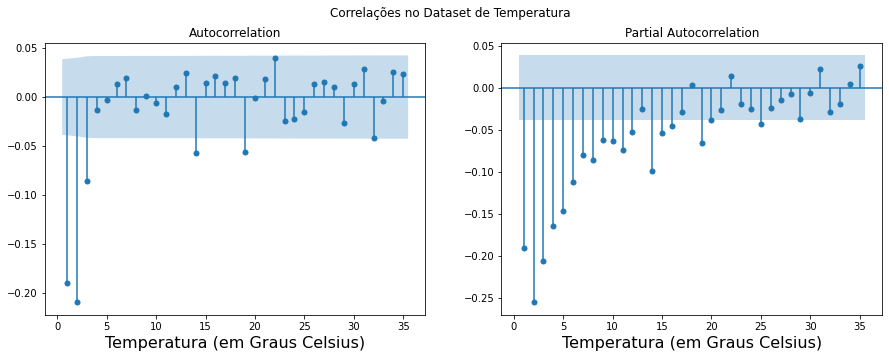

In [43]:
plota_correlacoes(data.Temp,'Temperatura','Graus Celsius')

Olhamos para o PACF - 8 lags

In [44]:
warnings.filterwarnings('ignore')

# Instanciando o modelo
ar_14 = AutoReg(endog=Temp_train.Temp,lags=14) # lags indica o atraso, endog a série de dados -> AR(8)
# Treinando o modelo
ar_14_trained = ar_14.fit() # Estamos colocando o resultado do ajuste em um novo objeto
ar_14_trained.summary() # Observando conclusões sobre os coeficientes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   Temp   No. Observations:                   76
Model:                    AutoReg(14)   Log Likelihood                  76.115
Method:               Conditional MLE   S.D. of innovations              0.071
Date:                Wed, 29 Jun 2022   AIC                             -4.777
Time:                        15:47:20   BIC                             -4.228
Sample:                    03-31-1985   HQIC                            -4.562
                         - 04-30-1990                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0019      0.009      0.210      0.834      -0.016       0.020
Temp.L1       -1.0150      0.129     -7.877      0.000      -1.268      -0.762
Temp.L2       -0.5553      0.181     -3.073      0.002      -0.910      -0.201
Temp.L3       -0.5362      0.196     -2.737      0.006      -0.920      -0.152
Temp.L4       -0.9345      0.200     -4.665      0.000      -1.327      -0.542
Temp.L5       -0.6907      0.225     -3.072      0.002      -1.131      -0.250
Temp.L6       -0.5453      0.224     -2.440      0.015      -0.983      -0.107
Temp.L7       -0.8022      0.208     -3.866      0.000      -1.209      -0.395
Temp.L8       -0.9605      0.208     -4.627      0.000      -1.367      -0.554
Temp.L9       -0.6424      0.232     -2.770      0.006      -1.097      -0.188
Temp.L10      -0.4973      0.231     -2.156      0.031      -0.949      -0.045
Temp.L11      -0.3844      0.207     -1.854      0.064      -0.791       0.022
Temp.L12      -0.1271      0.195     -0.653      0.514      -0.509       0.254
Temp.L13       0.1366      0.178      0.766      0.443      -0.213       0.486
Temp.L14       0.1460      0.123      1.189      0.234      -0.095       0.387
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0078           -0.4312j            1.0962           -0.4356
AR.2            -1.0078           +0.4312j            1.0962            0.4356
AR.3            -1.2600           -0.0000j            1.2600           -0.5000
AR.4            -0.7846           -0.7941j            1.1164           -0.3740
AR.5            -0.7846           +0.7941j            1.1164            0.3740
AR.6            -0.5638           -1.0305j            1.1746           -0.3297
AR.7            -0.5638           +1.0305j            1.1746            0.3297
AR.8             0.1938           -1.1015j            1.1184           -0.2223
AR.9             0.1938           +1.1015j            1.1184            0.2223
AR.10            0.5445           -0.9251j            1.0735           -0.1653
AR.11            0.5445           +0.9251j            1.0735            0.1653
AR.12            0.8605           -0.5022j            0.9963           -0.0841
AR.13            0.8605           +0.5022j            0.9963            0.0841
AR.14            1.8390           -0.0000j            1.8390           -0.0000
------------------------------------------------------------------------------
"""

In [45]:
# Vamos usar 6 defasagens
ar_11 = AutoReg(endog=Temp_train.Temp,lags=11) # lags indica o atraso, endog a série de dados -> AR(1)
# Treinando o modelo
ar_11_trained = ar_11.fit() # Estamos colocando o resultado do ajuste em um novo objeto
ar_11_trained.summary() # Observando conclusões sobre os coeficientes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   Temp   No. Observations:                   76
Model:                    AutoReg(11)   Log Likelihood                  78.856
Method:               Conditional MLE   S.D. of innovations              0.072
Date:                Wed, 29 Jun 2022   AIC                             -4.864
Time:                        15:47:20   BIC                             -4.429
Sample:                    12-31-1984   HQIC                            -4.693
                         - 04-30-1990                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.009      0.161      0.872      -0.016       0.019
Temp.L1       -0.9418      0.120     -7.858      0.000      -1.177      -0.707
Temp.L2       -0.4756      0.152     -3.128      0.002      -0.774      -0.178
Temp.L3       -0.5486      0.141     -3.898      0.000      -0.824      -0.273
Temp.L4       -0.9004      0.120     -7.497      0.000      -1.136      -0.665
Temp.L5       -0.5929      0.129     -4.589      0.000      -0.846      -0.340
Temp.L6       -0.5643      0.133     -4.254      0.000      -0.824      -0.304
Temp.L7       -0.8699      0.128     -6.791      0.000      -1.121      -0.619
Temp.L8       -0.8885      0.127     -6.999      0.000      -1.137      -0.640
Temp.L9       -0.6134      0.148     -4.147      0.000      -0.903      -0.324
Temp.L10      -0.5682      0.152     -3.732      0.000      -0.867      -0.270
Temp.L11      -0.3289      0.114     -2.888      0.004      -0.552      -0.106
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8614           -0.5047j            0.9984           -0.0844
AR.2             0.8614           +0.5047j            0.9984            0.0844
AR.3             0.4926           -0.9682j            1.0863           -0.1751
AR.4             0.4926           +0.9682j            1.0863            0.1751
AR.5             0.0768           -1.2143j            1.2168           -0.2399
AR.6             0.0768           +1.2143j            1.2168            0.2399
AR.7            -0.6795           -0.8280j            1.0712           -0.3594
AR.8            -0.6795           +0.8280j            1.0712            0.3594
AR.9            -0.9838           -0.4874j            1.0979           -0.4268
AR.10           -0.9838           +0.4874j            1.0979            0.4268
AR.11           -1.2623           -0.0000j            1.2623           -0.5000
------------------------------------------------------------------------------
"""

# Previsões sobre os dados de `treino` e `teste`

As previsões foram melhores que no modelo `AR(1)`?|

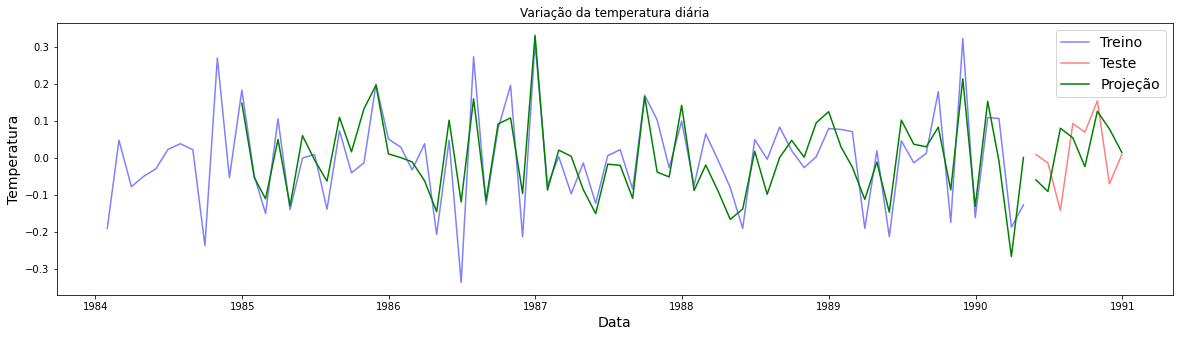

In [70]:
# Prevendo sobre dados existentes
Temp_train['Previsoes'] = ar_11_trained.predict()
Temp_test['Previsoes'] = ar_11_trained.predict(start=Temp_train.index.max(),
                                              end=Temp_test.index.max())

# Plotando resultados
plt.figure(figsize=(20,5))
plt.plot(Temp_train.Temp,color='b',alpha=0.5) # Dados reais de treino
plt.plot(Temp_test.Temp,color='r',alpha=0.5) # Dados reais de teste
plt.plot(Temp_train.Previsoes,color='g') # Projeção treino
plt.plot(Temp_test.Previsoes,color='g') # Projeção treino
plt.xlabel('Data',size=14)
plt.ylabel('Temperatura',size=14)
plt.title('Variação da temperatura diária')
plt.legend(['Treino','Teste','Projeção'],prop={'size':14})
plt.show()

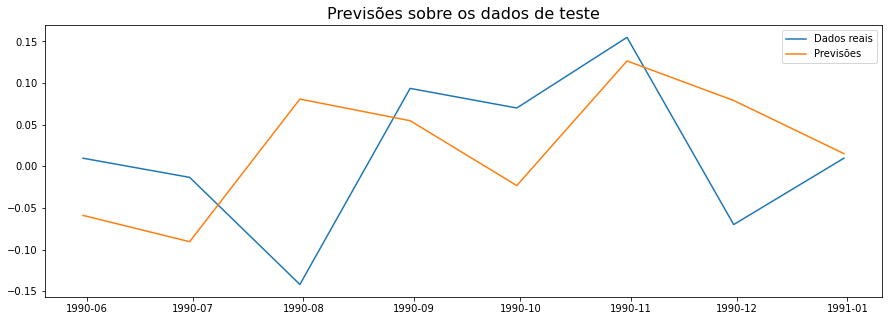

In [69]:
# Prevendo sobre os dados de teste e construindo o gráfico
Temp_test['Previsoes'] = ar_11_trained.predict(start=Temp_train.index.max(),
                                               end=Temp_test.index.max()) # Treinando sobre os índices do teste

# Plotando dados previstos
plt.figure(figsize=(15,5))
plt.plot(Temp_test.Temp)
plt.plot(Temp_test.Previsoes)
plt.legend(['Dados reais','Previsões'])
plt.title('Previsões sobre os dados de teste',size=16)
plt.show()

# E como avaliar performance?


Após realizar essas etapas de identificação e estimação dos parâmetros, é necessário realizar um diagnóstico do modelo, isto é, verificar se ele está adequado aos dados e, caso não esteja, voltar as etapas
anteriores.

Para avaliar o modelo usamos os erros (Resíduos) que correspondem a diferença entre os valores reais e os valores previstos. Dessa forma, é necessário verificar se os resíduos não estão correlacionados (são independentes) e dependendo do método de estimação dos parâmetros do modelo se eles possuem uma distribuição normal.

Além disso, um dos principais problemas de séries temporais é o de que **o número de features pode ser muito grande**! Isso depende diretamente do número de atrasos que consideramos, e precisamos levar isso em consideração ao avaliar o modelo.


In [48]:
# Revisitando nosso modelo treinado, apenas valores não nulos
Temp_train_perf = Temp_train[~Temp_train.Previsoes.isna()]
Temp_train_perf.head()

,Temp,Previsoes
Date,,
1984-12-31,0.183871,0.148518
1985-01-31,-0.048387,-0.052852
1985-02-28,-0.150000,-0.110318
1985-03-31,0.106452,0.050380
1985-04-30,-0.140000,-0.129418


Podemos tentar usar métricas conhecidas de regressão, e vamos relembrar algumas delas:
* `RMSE`: Erro quadrático médio, pune mais outliers
* `MAE`: Erro absoluto médio, pune menos outliers
* `R2`: Coeficiente de correlação, ajuda a entender o quanto da variância dos dados o modelo explica _além_ da média

In [49]:
# Importando métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Avaliando métricas sobre os dados de treino
print('Métrica RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(Temp_train_perf.Temp, Temp_train_perf.Previsoes))))
print('Métrica MAE: {:.2f}'.format(mean_absolute_error(Temp_train_perf.Temp, Temp_train_perf.Previsoes)))
print('Métrica R2: {:.2f}'.format(r2_score(Temp_train_perf.Temp, Temp_train_perf.Previsoes)))

Métrica RMSE: 0.07
Métrica MAE: 0.06
Métrica R2: 0.70


# <font color='red'> A questão dessas métricas é que elas são `muito otimistas` a medida que o número de parametros do modelo aumenta. </font>


Como então **penalizar modelos com muitas variáveis**?


### Métricas de Séries Temporais: BIC e AIC

Temos duas métricas muito utilizadas em séries temporais: o `Bayesian Information Criteria` e o `Akaike Information Criteria`.
Elas possuem definições muito similares, mas basicamente acrescentam uma **penalidade** às métricas já conhecidas que se baseiam em soma dos erros:


A AIC é composta por dois aspectos importantes

* Probabilidade de log máxima (mede quão bem o modelo fornecido capturou a variação na variável dependente).
* Número de parâmetros.

É calculado pela fórmula:


<img src="https://miro.medium.com/max/546/1*sadddjTXEavxqY7glR23iQ.png" width=400>


Quanto menor o AIC, melhor! E com base nessa fórmula, adicionar mais parâmetros indiscriminadamente não ajuda a melhorar o AIC, na verdade penaliza a pontuação se a adição desses parametros não for significativa. Portanto, se dois modelos explicarem igualmente a variância nos dados fornecidos, o modelo com menos parâmetros terá uma pontuação de AIC menor e será selecionado como o modelo de melhor ajuste.

No próprio modelo `AutoReg` podemos avaliar o AIC do ajuste:

In [50]:
# Extraindo a AIC do modelo treinado
ar_11_trained.aic

-4.864216875957445

**Um ponto importante a ser observado é que a pontuação AIC por si só não tem significância. Tem que ser comparado com outro modelo.**

# Otimizando o hiperparâmetro p em modelos AR(p)

Agora que sabemos como estimar o modelo e como avaliá-lo, podemos fazer uma otimização de parametros. 

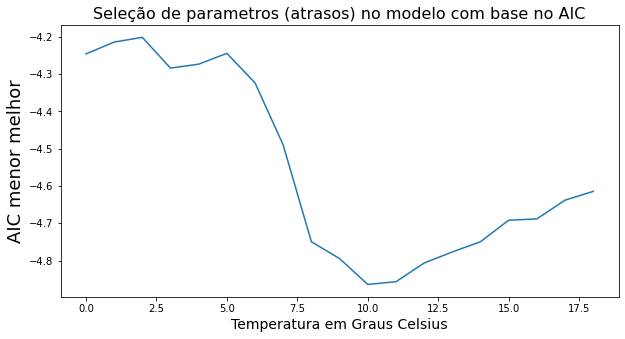

In [51]:
metricas = []
for i in range(1,20): # de 1 a 20 parametros 
    model = AutoReg(endog=Temp_train['Temp'], lags=i).fit()
    metricas.append(model.aic)    

# Plotando o resultado
plt.figure(figsize=(10,5))
plt.plot(metricas)
plt.xlabel('Temperatura em Graus Celsius', size = 14)
plt.ylabel('AIC menor melhor', size = 18)
plt.title('Seleção de parametros (atrasos) no modelo com base no AIC', size = 16)
plt.show()

In [38]:
print('11 Parametros -AIC:', AutoReg(endog=Temp_train.Temp,lags=11).fit().aic)
print('10 Parametros -AIC:', AutoReg(endog=Temp_train.Temp,lags=10).fit().aic)

11 Parametros -AIC: -4.864216875957445
10 Parametros -AIC: -4.794848105956032


In [52]:
# Importando o módulo
from statsmodels.tsa.ar_model import ar_select_order

# Instanciando e aplicando aos dados
seletor = ar_select_order(endog=Temp_train.Temp, maxlag=20, trend = 'n') # max lags indica o numero de lags que vamos testar 

# Veriticando os lags selecionados
seletor.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### Combinando os modelos AR(p) e MA(q) em um só: o modelo ARMA (p,q)

O modelo `MA` médias moveis permite que usemos os valores anteriores dos _erros_ da série como `features` da nossa regressão! Vamos agora treinar uma Média Móvel simples, usando apénas **o erro do primeiro atraso** como feature.

Diferentemente do modelo `AR`, não temos implementações isoladas do modelo `MA` no statsmodels, mas temos algo melhor do que isso: a combinação dos modelos `AR` e `MA` em um único modelo, o `ARMA`!

In [53]:
# O modelo MA também está no statsmodels, dentro do arma model
from statsmodels.tsa.arima_model import ARMA

# Instanciando o modelo
ma_1 = ARMA(endog=Temp_train.Temp,order=(0,1)) # A tupla 'order' indica os parâmetros do AR e do MA, respectivamente
# Treinando o modelo

ma_1_trained = ma_1.fit() # Estamos colocando o resultado do ajuste em um novo objeto
ma_1_trained.summary() # Observando conclusões sobre os coeficientes

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                   76
Model:                     ARMA(0, 1)   Log Likelihood                  53.430
Method:                       css-mle   S.D. of innovations              0.120
Date:                Wed, 29 Jun 2022   AIC                           -100.861
Time:                        15:47:49   BIC                            -93.869
Sample:                    01-31-1984   HQIC                           -98.066
                         - 04-30-1990                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.008     -0.213      0.831      -0.018       0.015
ma.L1.Temp    -0.3881      0.109     -3.561      0.000      -0.602      -0.174
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.5770           +0.0000j            2.5770            0.0000
-----------------------------------------------------------------------------
"""

Da mesma forma que no modelo `MA`, vamos também avaliar o modelo nos conjuntos de treino e teste:

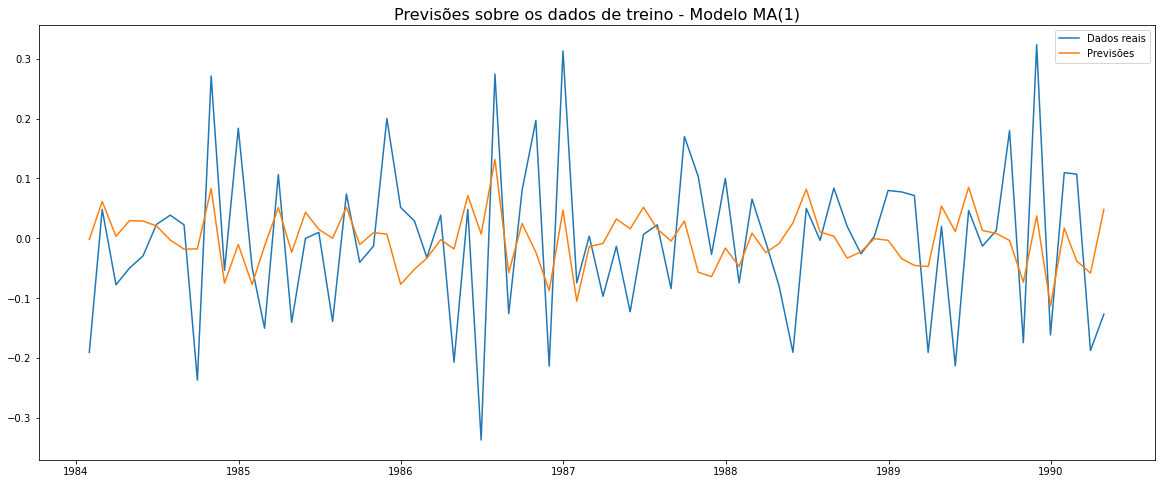

In [54]:
# Prevendo sobre dados existentes
Temp_train['Previsoes'] = ma_1_trained.predict()
Temp_train.head()

# Plotando dados previstos
plt.figure(figsize=(20,8))
plt.plot(Temp_train.Temp)
plt.plot(Temp_train.Previsoes)
plt.legend(['Dados reais','Previsões'])
plt.title('Previsões sobre os dados de treino - Modelo MA(1)',size=16)
plt.show()

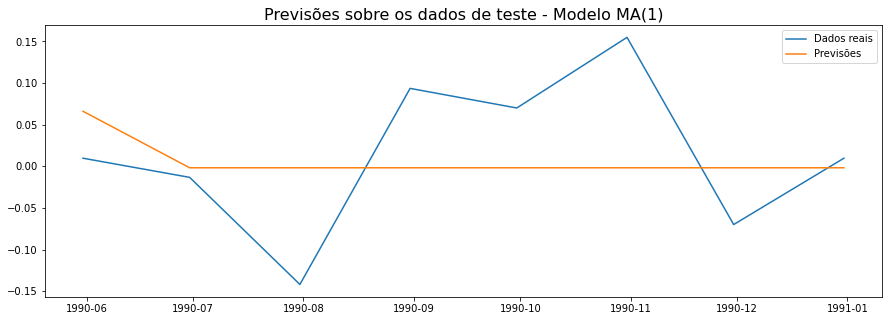

In [55]:
# Prevendo sobre os dados de teste e construindo o gráfico
Temp_test['Previsoes'] = ma_1_trained.predict(start=Temp_train.index.max(),
                                              end=Temp_test.index.max()
                                           ) # Treinando sobre os índices do teste

# Plotando dados previstos
plt.figure(figsize=(15,5))
plt.plot(Temp_test.Temp)
plt.plot(Temp_test.Previsoes)
plt.legend(['Dados reais','Previsões'])
plt.title('Previsões sobre os dados de teste - Modelo MA(1)',size=16)
plt.show()

### Escolhendo coeficientes pelo ACF

Como vimos anteriormente, podemos usar o `ACF` para termos uma ideia do número de atrasos que deveríamos considerar para nosso modelo de média móvel. Vamos retomar este gráfico:

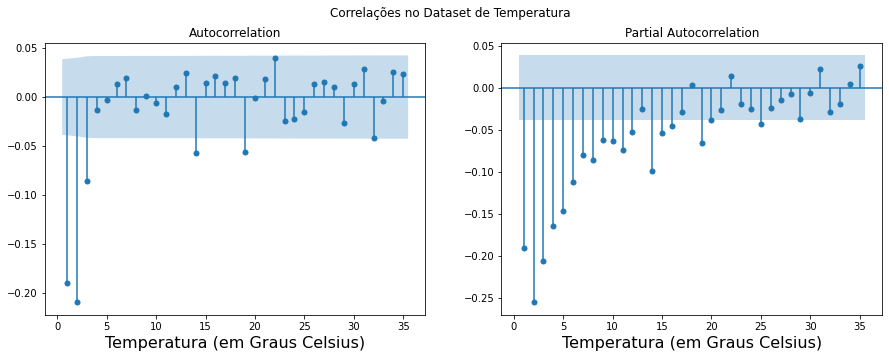

In [57]:
# Construindo novamente o ACF e o PACF
plota_correlacoes(data.Temp,'Temperatura','Graus Celsius')

# Modelo Arma (1,1)

In [58]:
# Treinando nova regressao, agora com 3 atrasos

# Instanciando o modelo
Arma = ARMA(endog=Temp_train.Temp,order=(1,1)) # lags indica o atraso, endog a série de dados
# Treinando o modelo
Arma_trained = Arma.fit() # Estamos colocando o resultado do ajuste em um novo objeto
Temp_train['Previsoes'] = Arma_trained.predict() # Prevendo sobre os dados de treino
Arma_trained.summary() # Observando conclusões sobre os coeficientes

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                   76
Model:                     ARMA(1, 1)   Log Likelihood                  56.033
Method:                       css-mle   S.D. of innovations              0.116
Date:                Wed, 29 Jun 2022   AIC                           -104.066
Time:                        15:48:10   BIC                            -94.743
Sample:                    01-31-1984   HQIC                          -100.340
                         - 04-30-1990                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025      0.009     -0.265      0.791      -0.021       0.016
ar.L1.Temp    -0.5489      0.158     -3.467      0.001      -0.859      -0.239
ma.L1.Temp     0.1016      0.172      0.591      0.554      -0.235       0.439
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8217           +0.0000j            1.8217            0.5000
MA.1           -9.8379           +0.0000j            9.8379            0.5000
-----------------------------------------------------------------------------
"""

Assim como no modelo `AR`, iremos plotar as performances do modelo `MA` nos dados preditos de treino e teste

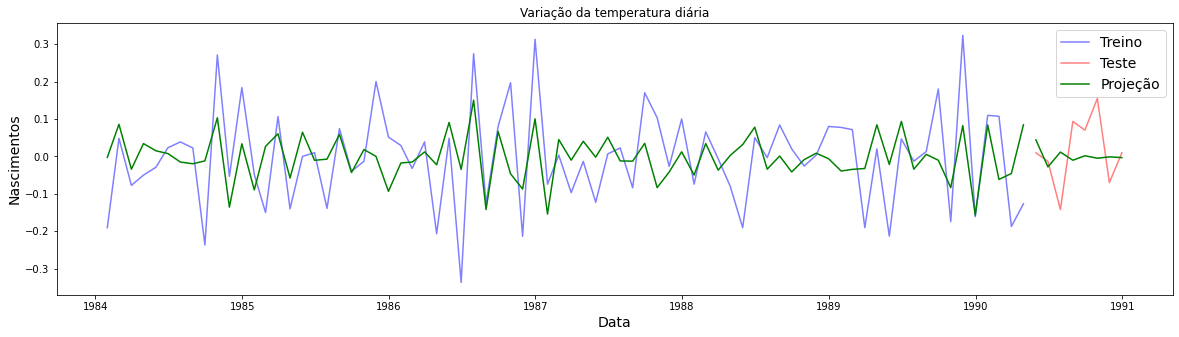

In [59]:
# Prevendo sobre dados existentes
Temp_train['Previsoes'] = Arma_trained.predict()
Temp_test['Previsoes'] = Arma_trained.predict(start=Temp_train.index.max(),
                                              end=Temp_test.index.max())

# Plotando resultados
plt.figure(figsize=(20,5))
plt.plot(Temp_train.Temp,color='b',alpha=0.5) # Dados reais de treino
plt.plot(Temp_test.Temp,color='r',alpha=0.5) # Dados reais de teste
plt.plot(Temp_train.Previsoes,color='g') # Projeção treino
plt.plot(Temp_test.Previsoes,color='g') # Projeção treino
plt.xlabel('Data',size=14)
plt.ylabel('Nascimentos',size=14)
plt.title('Variação da temperatura diária')
plt.legend(['Treino','Teste','Projeção'],prop={'size':14})
plt.show()

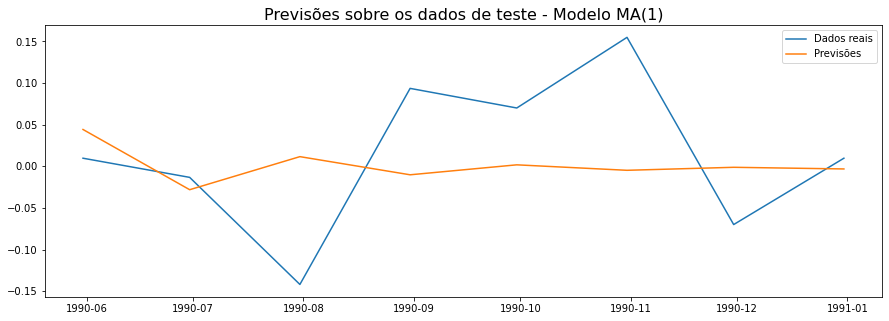

In [60]:
# Prevendo sobre os dados de teste e construindo o gráfico
Temp_test['Previsoes'] = Arma_trained.predict(start=Temp_train.index.max(),
                                              end=Temp_test.index.max()
                                           ) # Treinando sobre os índices do teste

# Plotando dados previstos
plt.figure(figsize=(15,5))
plt.plot(Temp_test.Temp)
plt.plot(Temp_test.Previsoes)
plt.legend(['Dados reais','Previsões'])
plt.title('Previsões sobre os dados de teste - Modelo MA(1)',size=16)
plt.show()

In [61]:
# Importando o módulo
from statsmodels.tsa.stattools import arma_order_select_ic

# Instanciando e aplicando aos dados
seletor = arma_order_select_ic(y=Temp_train.Temp, max_ar=7, max_ma=6, 
                               ic=["aic"], trend = "c") 
seletor

{'aic':             0           1           2           3           4           5  \
 0  -89.357743 -100.860746 -105.473228 -127.788612 -125.965793 -126.640482   
 1 -105.740386 -104.065724 -106.339477 -125.905083 -128.123585 -121.960665   
 2 -104.353057 -110.028616 -109.281126 -125.414490 -126.334517 -126.359599   
 3 -104.442106 -113.722051 -114.206587 -125.308903 -124.541667 -122.982108   
 4 -111.213952 -130.560501 -130.674616 -130.144431 -123.256481 -121.334896   
 5 -110.778196 -128.790270 -127.397015 -142.212299 -121.531999 -126.455509   
 6 -109.921139 -130.065010 -149.402527 -130.672163 -135.180918 -140.127158   
 7 -116.517711 -138.344245  -96.150922 -148.528280 -150.829900 -148.076497   
 
             6  
 0 -126.981833  
 1 -124.539532  
 2 -124.529096  
 3 -130.957063  
 4 -122.208307  
 5 -141.069692  
 6 -145.779457  
 7 -150.163887  ,
 'aic_min_order': (7, 4)}

# Modelando séries com tendências e sazonalidades

* O que fazer quando a série não é estacionárias. Quando elas possuem tendências e sazonalidades?

Vamos retomar o exemplo não estacionário dos carros. 

In [95]:
data_nao_estac = pd.read_csv('Vendas.csv',sep=';')
data_nao_estac['mes'] = pd.to_datetime(data_nao_estac['mes'])

data_nao_estac.head()

,mes,vendas
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


In [96]:
print('Menor data: {}'.format(data_nao_estac.mes.min())) # Mínimo
print('Maior data: {}'.format(data_nao_estac.mes.max())) # Máximo

Menor data: 2001-01-01 00:00:00
Maior data: 2003-12-01 00:00:00


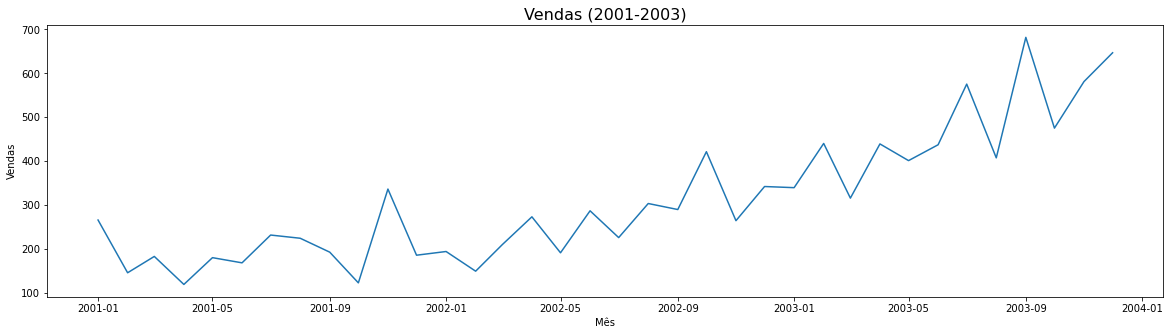

In [97]:
data_nao_estac.set_index('mes',inplace=True)

# Gráfico dos dados
plt.figure(figsize=(20,5))
plt.plot(data_nao_estac)
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Vendas (2001-2003)',size=16)
plt.show()

Temos uma clara tendência de crescimento das vendas ao longo dos anos, o que faz com que localmente a média não seja constante!

In [98]:
# Teste de estacionariedade
significancia = 0.05

# Instanciando o teste (o p-valor é sempre o SEGUNDO número da tupla)
teste_fuller_naoestac = adfuller(data_nao_estac.vendas) # Colocar apenas a coluna referente aos dados!

if(teste_fuller_naoestac[1] <= significancia): 
    print("O p-valor do teste foi de {:.2f}.".format(teste_fuller_naoestac[1]), 'A série é estacionária.')
else:
    print("O p-valor do teste foi de {:.2f}.".format(teste_fuller_naoestac[1]), 'A série NÃO É estacionária.')

O p-valor do teste foi de 1.00. A série NÃO É estacionária.


Como esta série não é estacionária, não podemos simplesmente usar os algoritmos `AR` e `MA` para utiliza-los precisaremos fazer algum tipo de **transformação** nos dados!

E se fizéssemos uma série da **variação** entre os valores de cada dia?

In [99]:
# O comando .diff() faz a diferença entre linhas consecutivas do dataset!
data_nao_estac['diferenca'] = data_nao_estac['vendas'].diff()

# Checando o dataset
data_nao_estac.head()

,vendas,diferenca
mes,,
2001-01-01,266.0,NaN
2001-02-01,145.9,-120.1
2001-03-01,183.1,37.2
2001-04-01,119.3,-63.8
2001-05-01,180.3,61.0


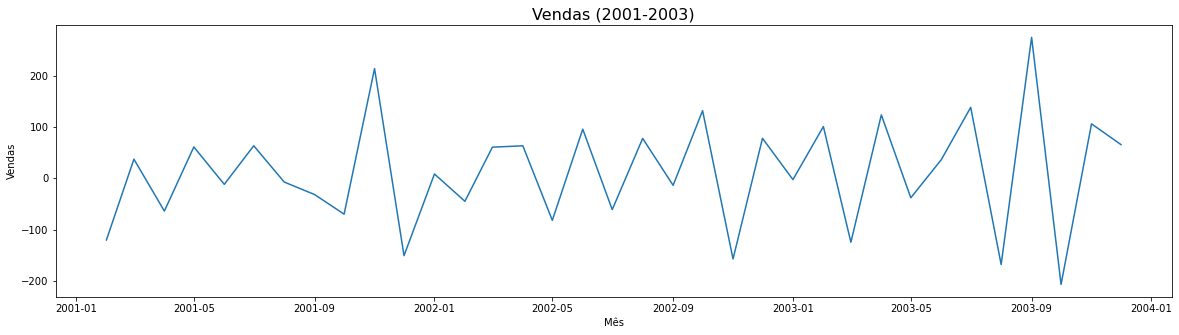

In [100]:
# Gráfico dos dados
plt.figure(figsize=(20,5))
plt.plot(data_nao_estac.diferenca)
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Vendas (2001-2003)',size=16)
plt.show()

Parece uma série estacionária?

In [101]:
# Teste de estacionariedade
significancia = 0.05

# Instanciando o teste
teste_diferenca = adfuller(data_nao_estac.diferenca.dropna()) # O primeiro registro é NaN então excluímos!

if(teste_diferenca[1] <= significancia): 
    print("O p-valor do teste foi de {:.2f}.".format(teste_diferenca[1]), 'A série é estacionária.')
else:
    print("O p-valor do teste foi de {:.2f}.".format(teste_diferenca[1]), 'A série NÃO É estacionária.')    

O p-valor do teste foi de 0.00. A série é estacionária.


Agora sim, voltamos a ter uma série estacionária!

### ARIMA (p,d,q) :Combinação dos métodos `AR (p)`, `MA(q)` e diferenciação

O modelo `ARIMA`(auto-regressivo integrado de médias móveis) é uma combinação dos modelos auto-regressivos (AR) e os modelos de médias móveis (MA) mais um elemento, **I**ntegrated, que indica o processo de diferenciação da série temporal antes da aplicação dos algoritmos que já conhecemos.

* Parâmetro Integrado (d): é a quantidade de vezes que precisamos fazer diferenciações na série original para torná-la estacionária.


<center> <img src="https://miro.medium.com/max/1400/0*OV16idLbBZZVRi3J" width=1000>

In [90]:
# Instanciando o ARIMA do módulo statsmodels
from statsmodels.tsa.arima_model import ARIMA

In [102]:

# Separando os dados em treino e teste
naoestac_train = data_nao_estac[data_nao_estac.index<='2003-06-01'].drop('diferenca',axis=1)
naoestac_test = data_nao_estac[data_nao_estac.index>'2003-06-01'].drop('diferenca',axis=1)

# Ajustando um ARIMA aos dados de grau 1
arima_vendas = ARIMA(endog=naoestac_train.vendas,order=(1,1,1)).fit()

# ARIMA
naoestac_train['prev_arima'] = arima_vendas.predict()
naoestac_test['prev_arima'] = arima_vendas.predict(start=naoestac_train.index.max(),end=naoestac_test.index.max())


Text(0.5, 1.0, 'Previsões no conjunto de Teste')

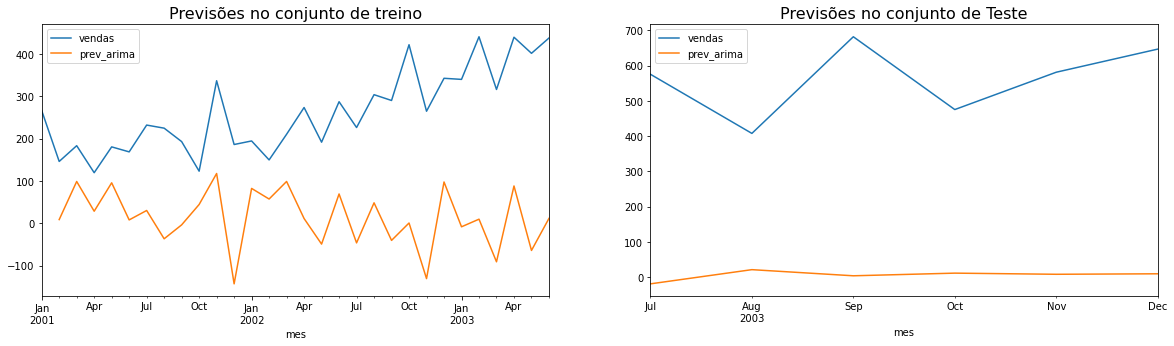

In [103]:
# Construindo gráficos para as previsões no treino e no teste
fig, ax = plt.subplots(1,2,figsize=(20,5))
naoestac_train.plot(ax=ax[0])
naoestac_test.plot(ax=ax[1])
ax[0].set_title('Previsões no conjunto de treino',size=16)
ax[1].set_title('Previsões no conjunto de Teste',size=16)

### Otimizando os hiperparâmetros `p`, `d` e `q` do ARIMA

Como o número de possibilidades de hiperparâmetros é exponencial, precisamos ter uma forma otimizada de teste dos modelos para a escolha do melhor, semelhante ao que fazemos em uma **otimização de hiperparâmetros**.

Para esta tarefa, podemos usar a função `auto_arima`, também disponível no pacote `pmarima`:

In [58]:
#!pip install pmdarima

In [104]:
# Importando o módulo
from pmdarima.arima import auto_arima

# Instanciando e aplicando aos dados
auto_vendas= auto_arima(naoestac_train.vendas, #Dados
                         max_p=5, # Grau máximo de teste do módulo AR,
                         max_d=3, # Grau máximo de teste de diferenciação (I)
                         max_q=5, # Grau máximo de teste do módulo MA
                         trace=True # Para imprimir os resultados dos testes
                         )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.868 seconds


O próprio resultado da função já é um ARIMA treinado, então podemos usar as funções `.predict_sample()` e `predict()`

<Figure size 432x288 with 0 Axes>

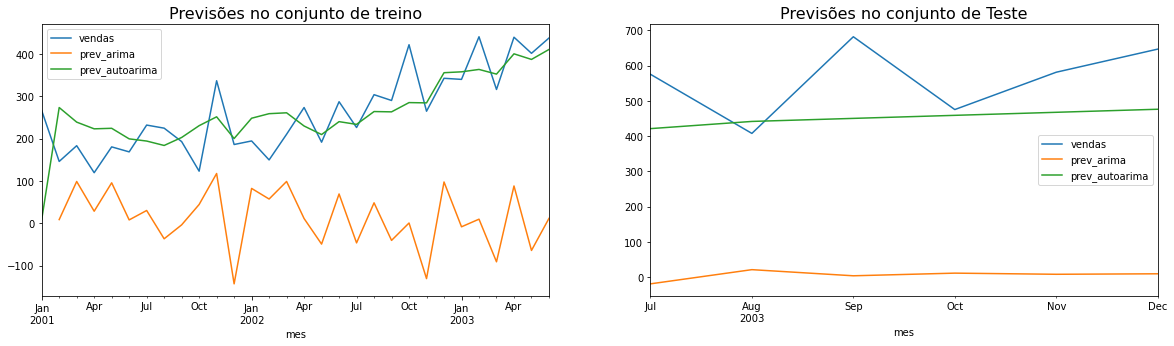

In [105]:
# Prevendo os resultados
naoestac_train['prev_autoarima'] = auto_vendas.predict_in_sample()
naoestac_test['prev_autoarima'] = auto_vendas.predict(start=naoestac_train.index.max(),n_periods=len(naoestac_test))

plt.figure()
# Plotando os resultados
fig, ax = plt.subplots(1,2,figsize=(20,5))
naoestac_train.plot(ax=ax[0])
naoestac_test.plot(ax=ax[1])
ax[0].set_title('Previsões no conjunto de treino',size=16)
ax[1].set_title('Previsões no conjunto de Teste',size=16)
plt.show()

## O que você precisa sair sabendo para a próxima aula:

* Divisão entre treino e teste para séries temporais
* Análise das correlações pelos gráficos de `PACF` e `ACF`
* Modelos `Autorregressivos (AR)` e de `Média Móvel (MA)`
* Avaliação de modelos usando a métrica `AIC`
* Modelos `ARMA`
* Modelo `ARIMA` para considerar a tendência dos dados e  o `auto_arima` para encontrar os melhores parâmetros que otimizaram nossa métrica